In [69]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [70]:
filenames = []

for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))

In [71]:
len(filenames)

44441

In [72]:
model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([
    model,
    GlobalMaxPooling2D()])


In [73]:
img = image.load_img('10001.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)
normalized_result


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
       0.04649905], dtype=float32)

In [74]:
result

array([ 0.       , 10.454597 ,  0.       , ...,  2.8591216,  6.806148 ,
       13.322454 ], dtype=float32)

In [75]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result


In [76]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
       0.06899219], dtype=float32)

In [86]:
image_features = []
for file in filenames[0:20]:
    image_features.append(extract_features_from_images(file, model))
    print(file)
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
images\10000.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
images\10001.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
images\10002.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
images\10003.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
images\10004.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
images\10005.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
images\10006.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
images\10007.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
images\10008.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
images\10009.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
images\10010.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
images\10011.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
images\10012.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
images\10013.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
images\10014.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
images\10015.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
images\10016.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
images\10

[array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
        0.06899219], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32),
 array([0.        , 0.10469119, 0.00198091, ..., 0.        , 0.03033769,
        0.02712847], dtype=float32),
 array([0.        , 0.12438459, 0.01465611, ..., 0.00289707, 0.04055161,
        0.06534589], dtype=float32),
 array([0.        , 0.09169203, 0.01569911, ..., 0.        , 0.00503581,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545276, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661068], dtype=float32),
 array([0.

In [87]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [88]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [89]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [90]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [91]:
np.array(Image_features).shape

(20, 2048)

In [92]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [93]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [94]:
input_image = extract_features_from_images('10001.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


In [95]:
distance,indices = neighbors.kneighbors([input_image])

In [96]:
indices[0]

array([ 1,  2,  0,  5, 10,  3], dtype=int64)

In [97]:
from IPython.display import Image

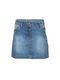

In [98]:
Image('10001.jpg')

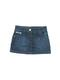

In [99]:
Image(filenames[indices[0][1]])

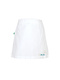

In [100]:
Image(filenames[indices[0][2]])

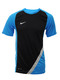

In [101]:
Image(filenames[indices[0][3]])

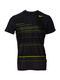

In [102]:
Image(filenames[indices[0][4]])

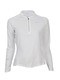

In [103]:
Image(filenames[indices[0][5]])